In [1]:
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [2]:
data_no = pd.read_csv('FinalData/no_error.csv')
data_no["Error"]=0
dataFc = pd.read_csv('FinalData/Fc_data.csv')
dataTc = pd.read_csv('FinalData/Tc_error.csv')
dataTr = pd.read_csv('FinalData/Tr_error.csv')
dataTj = pd.read_csv('FinalData/Tj_error.csv')

data_no = data_no.iloc[:,2:]
dataTc = dataTc.iloc[:,2:]
dataTr = dataTr.iloc[:,2:]
dataTj = dataTj.iloc[:,2:]

data = pd.concat([data_no,dataFc,dataTc,dataTr,dataTj],ignore_index=True)
data['Error'].unique()


array([0, 1, 2, 3, 4], dtype=int64)

In [3]:
data = data.drop(['Unnamed: 0', 'Current'],axis=1)

In [4]:
X = data.iloc[:,[0,1,2,3]]
y = data.iloc[:,4]

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='majority')
X,y = rus.fit_resample(X,y)
print("rev index:",X.shape)

rev index: (59972, 4)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[['Fc','Tc','Tr','Tj']] = sc.fit_transform(X_train[['Fc','Tc','Tr','Tj']])
X_test[['Fc','Tc','Tr','Tj']] = sc.transform(X_test[['Fc','Tc','Tr','Tj']])

c:\Users\ASUS\miniconda3\envs\mini-project-env\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\ASUS\miniconda3\envs\mini-project-env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ASUS\miniconda3\envs\mini-project-env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\ASUS\miniconda3\envs\mini-project-env\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and wil

In [7]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf',C=0.5,gamma=100,decision_function_shape="ovo")
clf.fit(X_train,y_train)

c:\Users\ASUS\miniconda3\envs\mini-project-env\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\ASUS\miniconda3\envs\mini-project-env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ASUS\miniconda3\envs\mini-project-env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


SVC(C=0.5, decision_function_shape='ovo', gamma=100)

In [8]:
y_pred = clf.predict(X_test)

c:\Users\ASUS\miniconda3\envs\mini-project-env\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\ASUS\miniconda3\envs\mini-project-env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ASUS\miniconda3\envs\mini-project-env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [9]:
[np.sum(y_test==i) for i in range(5)]

[2366, 2353, 2388, 2443, 2445]

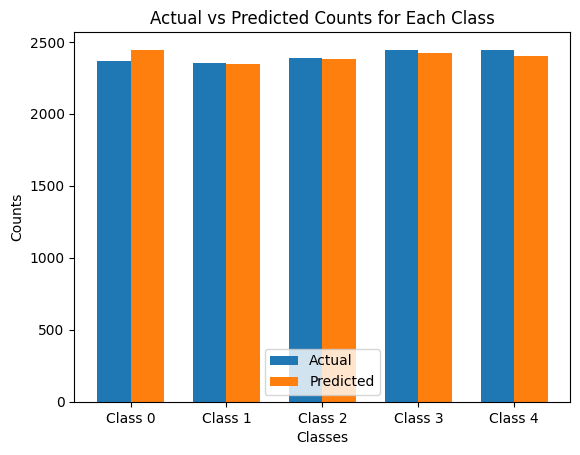

In [10]:
import matplotlib.pyplot as plt

# Creating the bar plot
fig, ax = plt.subplots()
width = 0.35  # the width of the bars
ind = range(1, 6)  # the x locations for the groups

# Counting the occurrences of each class in y_test and y_pred
actual_counts = [np.sum(y_test==i) for i in range(5)]
predicted_counts = [np.sum(y_pred==i) for i in range(5)]

# Plotting the bar plot
rects1 = ax.bar(ind, actual_counts, width, label='Actual')
rects2 = ax.bar([i + width for i in ind], predicted_counts, width, label='Predicted')

# Adding labels, title, and legend
ax.set_xlabel('Classes')
ax.set_ylabel('Counts')
ax.set_title('Actual vs Predicted Counts for Each Class')
ax.set_xticks([i + width / 2 for i in ind])
ax.set_xticklabels(['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
ax.legend()

# Displaying the plot
plt.show()

In [11]:

target_names=["No error","Fc Error","Tc Error","Tr Error","Tj Error"]

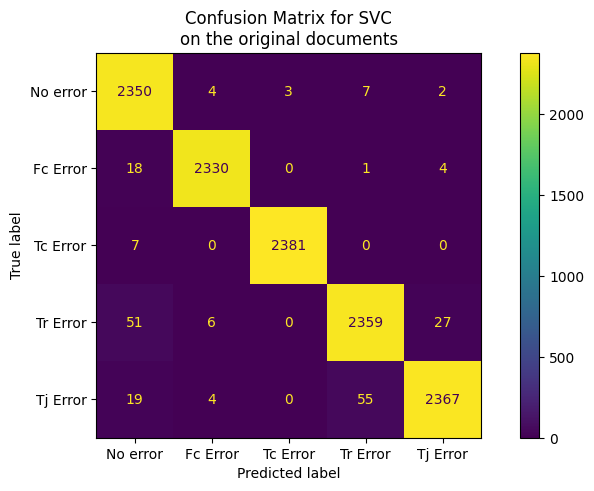

In [12]:
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
_ = ax.set_title(
    f"Confusion Matrix for {clf.__class__.__name__}\non the original documents"
)

Predicting people's names on the test set


c:\Users\ASUS\miniconda3\envs\mini-project-env\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\ASUS\miniconda3\envs\mini-project-env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ASUS\miniconda3\envs\mini-project-env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


done in 13.742s
              precision    recall  f1-score   support

    No error       0.96      0.99      0.98      2366
    Fc Error       0.99      0.99      0.99      2353
    Tc Error       1.00      1.00      1.00      2388
    Tr Error       0.97      0.97      0.97      2443
    Tj Error       0.99      0.97      0.98      2445

    accuracy                           0.98     11995
   macro avg       0.98      0.98      0.98     11995
weighted avg       0.98      0.98      0.98     11995



c:\Users\ASUS\miniconda3\envs\mini-project-env\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\ASUS\miniconda3\envs\mini-project-env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ASUS\miniconda3\envs\mini-project-env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


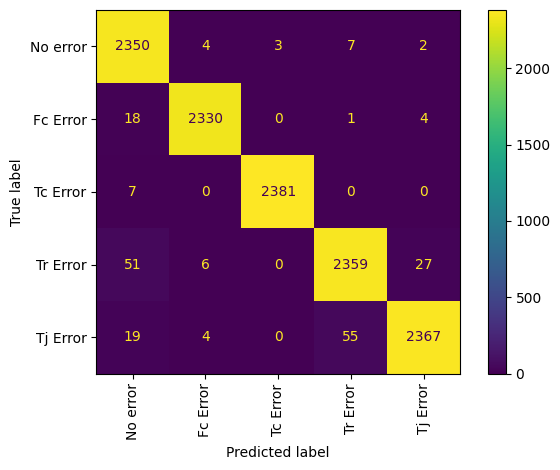

In [13]:
from time import time
from sklearn.metrics import classification_report
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(
    clf, X_test, y_test, display_labels=target_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

In [14]:
import joblib
pickle_clf = joblib.load("F_Model_9_Kernel_rbf_C_0.1_gamma_100_decision_ovo_degree_2.pkl")
y_pred_PIckle = pickle_clf.predict(X_test)

c:\Users\ASUS\miniconda3\envs\mini-project-env\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\ASUS\miniconda3\envs\mini-project-env\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\ASUS\miniconda3\envs\mini-project-env\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ASUS\miniconda3\envs\mini-project-env\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is

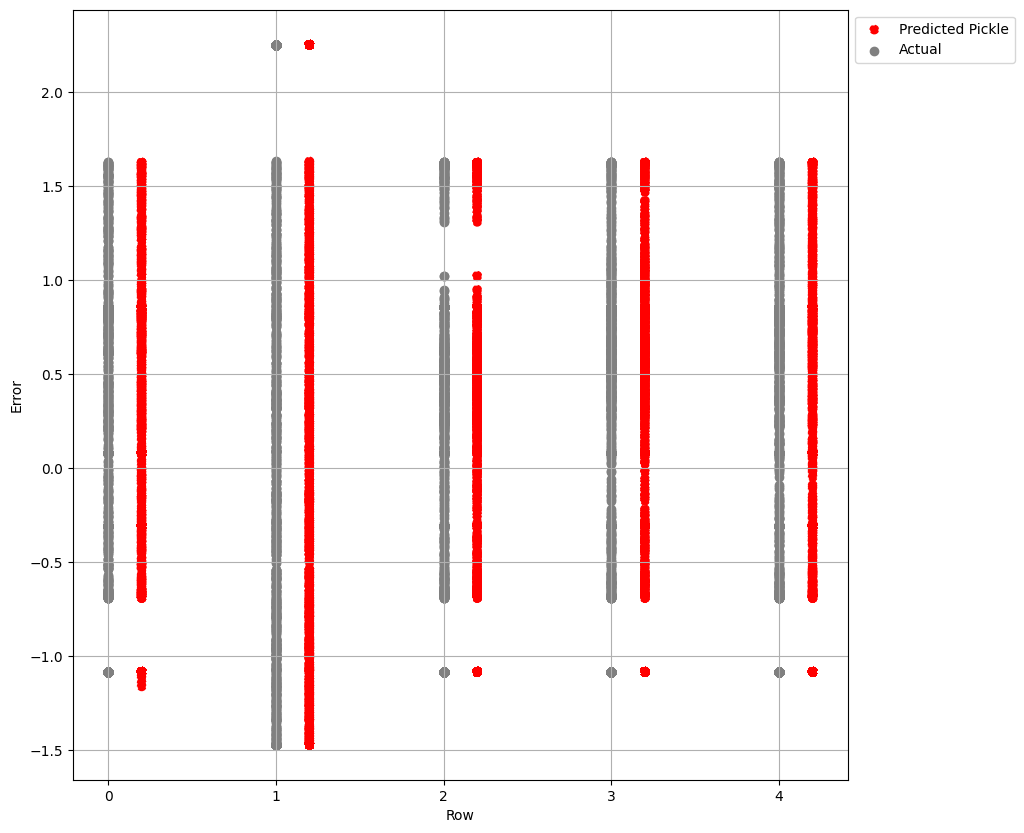

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# no_error=no_error
# Fc_error=Tr_error
# data1_length = len(no_error)
# data2_length = len(Fc_error)

# if data2_length < data1_length:
#    batch_reactor_df  = Fc_error[:data2_length]

# y2 = range(len(y1))
# y1 = range(len(y1))

x = X_test["Fc"]
# y1 = y_test["Tc"]

y1 = y_pred_PIckle
y2 = y_test

plt.figure(figsize=(10, 10))
plt.scatter( y1+0.2,x, label='Predicted Pickle', color='red', linestyle='--')

plt.scatter( y2,x, label='Actual', color='Gray', linestyle='-')


plt.xlabel('Row')
plt.ylabel('Error')

# plt.title('Two Lines for the Same Column from Different Datasets')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True)
plt.show()

In [19]:
from functools import partial
import itertools

from cycler import cycler

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.ticker as mticker


def filled_hist(ax, edges, values, bottoms=None, orientation='v',
                **kwargs):
    """
    Draw a histogram as a stepped patch.

    Parameters
    ----------
    ax : Axes
        The axes to plot to

    edges : array
        A length n+1 array giving the left edges of each bin and the
        right edge of the last bin.

    values : array
        A length n array of bin counts or values

    bottoms : float or array, optional
        A length n array of the bottom of the bars.  If None, zero is used.

    orientation : {'v', 'h'}
       Orientation of the histogram.  'v' (default) has
       the bars increasing in the positive y-direction.

    **kwargs
        Extra keyword arguments are passed through to `.fill_between`.

    Returns
    -------
    ret : PolyCollection
        Artist added to the Axes
    """
    print(orientation)
    if orientation not in 'hv':
        raise ValueError(f"orientation must be in {{'h', 'v'}} "
                         f"not {orientation}")

    kwargs.setdefault('step', 'post')
    kwargs.setdefault('alpha', 0.7)
    edges = np.asarray(edges)
    values = np.asarray(values)
    if len(edges) - 1 != len(values):
        raise ValueError(f'Must provide one more bin edge than value not: '
                         f'{len(edges)=} {len(values)=}')

    if bottoms is None:
        bottoms = 0
    bottoms = np.broadcast_to(bottoms, values.shape)

    values = np.append(values, values[-1])
    bottoms = np.append(bottoms, bottoms[-1])
    if orientation == 'h':
        return ax.fill_betweenx(edges, values, bottoms,
                                **kwargs)
    elif orientation == 'v':
        return ax.fill_between(edges, values, bottoms,
                               **kwargs)
    else:
        raise AssertionError("you should never be here")


def stack_hist(ax, stacked_data, sty_cycle, bottoms=None,
               hist_func=None, labels=None,
               plot_func=None, plot_kwargs=None):
    """
    Parameters
    ----------
    ax : axes.Axes
        The axes to add artists too

    stacked_data : array or Mapping
        A (M, N) shaped array.  The first dimension will be iterated over to
        compute histograms row-wise

    sty_cycle : Cycler or operable of dict
        Style to apply to each set

    bottoms : array, default: 0
        The initial positions of the bottoms.

    hist_func : callable, optional
        Must have signature `bin_vals, bin_edges = f(data)`.
        `bin_edges` expected to be one longer than `bin_vals`

    labels : list of str, optional
        The label for each set.

        If not given and stacked data is an array defaults to 'default set {n}'

        If *stacked_data* is a mapping, and *labels* is None, default to the
        keys.

        If *stacked_data* is a mapping and *labels* is given then only the
        columns listed will be plotted.

    plot_func : callable, optional
        Function to call to draw the histogram must have signature:

          ret = plot_func(ax, edges, top, bottoms=bottoms,
                          label=label, **kwargs)

    plot_kwargs : dict, optional
        Any extra keyword arguments to pass through to the plotting function.
        This will be the same for all calls to the plotting function and will
        override the values in *sty_cycle*.

    Returns
    -------
    arts : dict
        Dictionary of artists keyed on their labels
    """
    # deal with default binning function
    if hist_func is None:
        hist_func = np.histogram

    # deal with default plotting function
    if plot_func is None:
        plot_func = filled_hist

    # deal with default
    if plot_kwargs is None:
        plot_kwargs = {}
    print(plot_kwargs)
    try:
        l_keys = stacked_data.keys()
        label_data = True
        if labels is None:
            labels = l_keys

    except AttributeError:
        label_data = False
        if labels is None:
            labels = itertools.repeat(None)

    if label_data:
        loop_iter = enumerate((stacked_data[lab], lab, s)
                              for lab, s in zip(labels, sty_cycle))
    else:
        loop_iter = enumerate(zip(stacked_data, labels, sty_cycle))

    arts = {}
    for j, (data, label, sty) in loop_iter:
        if label is None:
            label = f'dflt set {j}'
        label = sty.pop('label', label)
        vals, edges = hist_func(data)
        if bottoms is None:
            bottoms = np.zeros_like(vals)
        top = bottoms + vals
        print(sty)
        sty.update(plot_kwargs)
        print(sty)
        ret = plot_func(ax, edges, top, bottoms=bottoms,
                        label=label, **sty)
        bottoms = top
        arts[label] = ret
    ax.legend(fontsize=10)
    return arts


# set up histogram function to fixed bins
edges = np.linspace(-3, 3, 20, endpoint=True)
hist_func = partial(np.histogram, bins=edges)

# set up style cycles
color_cycle = cycler(facecolor=plt.rcParams['axes.prop_cycle'][:5])
label_cycle = cycler(label=[f'set {n}' for n in range(5)])
hatch_cycle = cycler(hatch=['/', '*', '+', '|','-'])

# Fixing random state for reproducibility
np.random.seed(19680801)

stack_data = np.random.randn(4, 12250)
dict_data = dict(zip((c['label'] for c in label_cycle), stack_data))

{}
{'facecolor': '#1f77b4', 'hatch': '/'}
{'facecolor': '#1f77b4', 'hatch': '/'}
v
{'facecolor': '#ff7f0e', 'hatch': '*'}
{'facecolor': '#ff7f0e', 'hatch': '*'}
v
{'facecolor': '#2ca02c', 'hatch': '+'}
{'facecolor': '#2ca02c', 'hatch': '+'}
v
{'facecolor': '#d62728', 'hatch': '|'}
{'facecolor': '#d62728', 'hatch': '|'}
v
{'facecolor': '#9467bd', 'hatch': '-'}
{'facecolor': '#9467bd', 'hatch': '-'}
v
{}
{'facecolor': '#1f77b4', 'hatch': '/'}
{'facecolor': '#1f77b4', 'hatch': '/'}
v
{'facecolor': '#ff7f0e', 'hatch': '*'}
{'facecolor': '#ff7f0e', 'hatch': '*'}
v
{'facecolor': '#2ca02c', 'hatch': '+'}
{'facecolor': '#2ca02c', 'hatch': '+'}
v
{'facecolor': '#d62728', 'hatch': '|'}
{'facecolor': '#d62728', 'hatch': '|'}
v
{'facecolor': '#9467bd', 'hatch': '-'}
{'facecolor': '#9467bd', 'hatch': '-'}
v


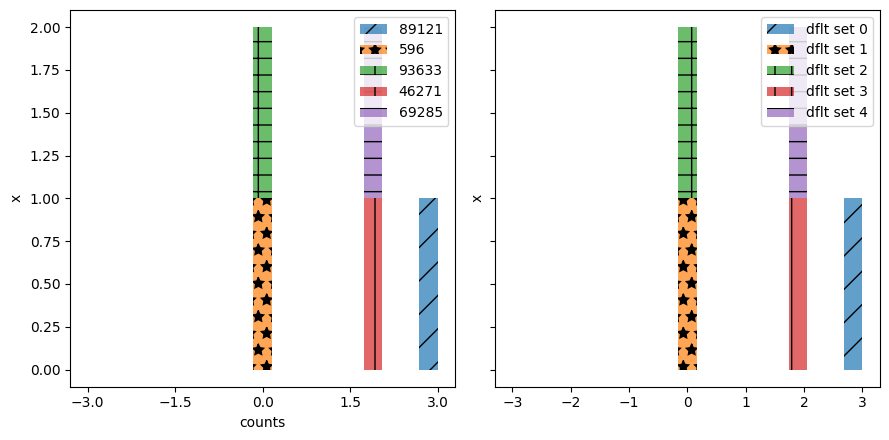

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4.5),
                               tight_layout=True, sharey=True)

arts = stack_hist(ax1, y_test, color_cycle + hatch_cycle,
                  hist_func=hist_func)

arts = stack_hist(ax2, y_pred, color_cycle + hatch_cycle,
                  hist_func=hist_func)
ax1.xaxis.set_major_locator(mticker.MaxNLocator(5))
ax1.set_xlabel('counts')
ax1.set_ylabel('x')
ax2.set_ylabel('x')

plt.show()

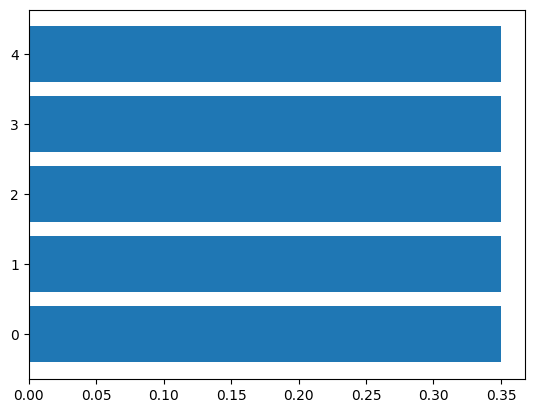

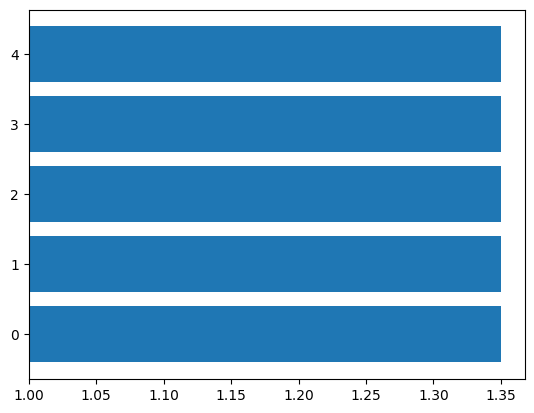

In [26]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import barh 
barh(y_test, width, height=0.8, left=None)
plt.show()
barh(y_pred, width, height=0.8, left=True)
plt.show()

<Axes: >

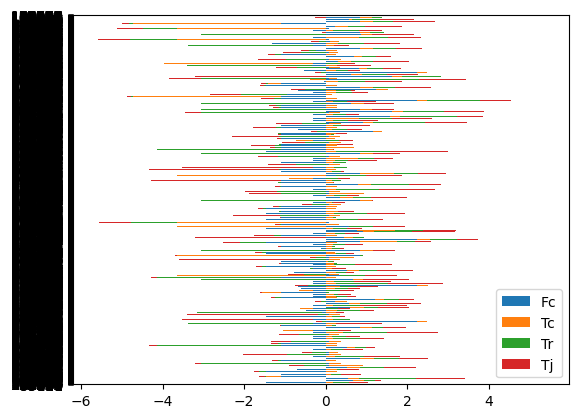

In [25]:
X_test.plot.barh(stacked=True)

<Axes: >

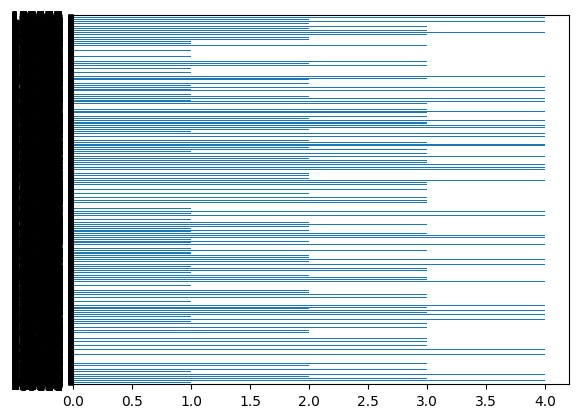

In [29]:
pd.DataFrame(y_test).plot.barh(stacked=True)

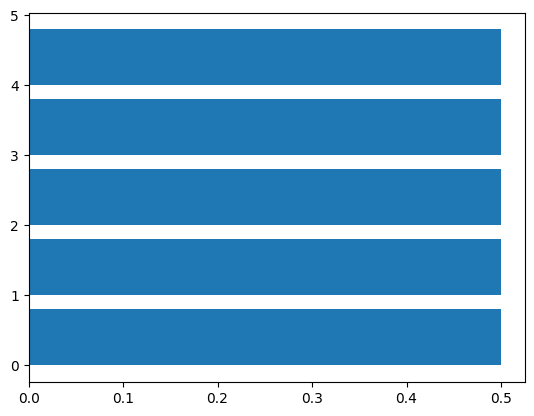

In [32]:
barh(y_test,align='edge',width=0.5)
plt.show()

In [ ]:

pd.DataFrame(y_test).plot.barh(stacked=True)

In [35]:
# pd.DataFrame([y_test,y_pred]).plot.barh(stacked=True)

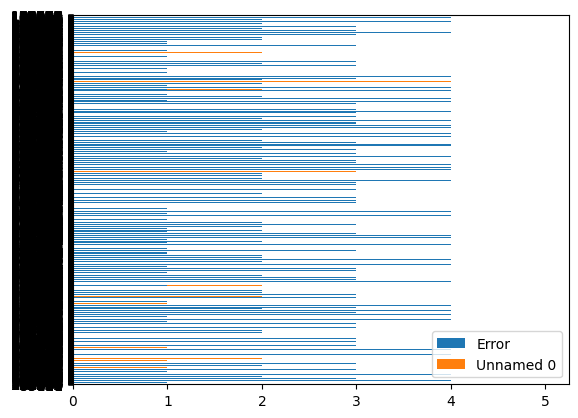

In [36]:
# Assuming y_test and y_pred are your data
data = pd.DataFrame([y_test, y_pred])
data.T.plot(kind='barh', stacked=True)
plt.show()

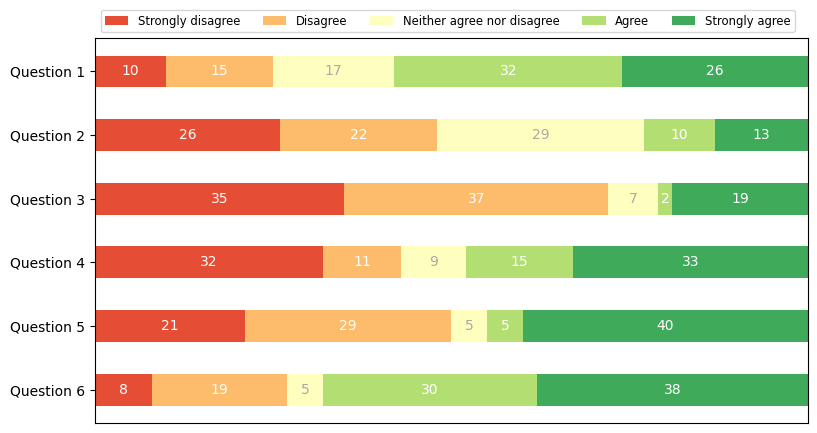

In [33]:
import matplotlib.pyplot as plt
import numpy as np

category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

Text(0.5, 1.0, 'Scatter Plot with Manual Feature Labels')

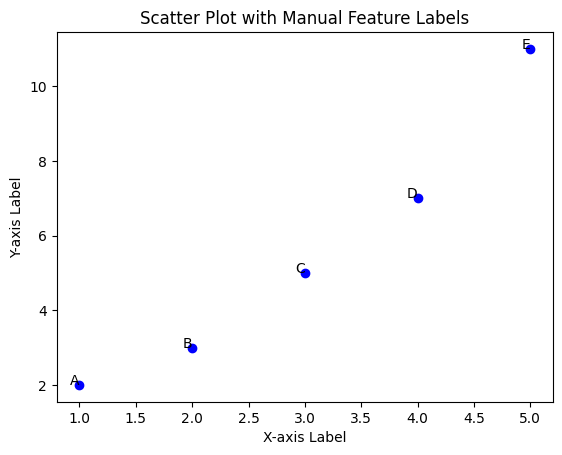

In [16]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]
predicted_labels = ['A', 'B', 'C', 'D', 'E']  # Replace with your predicted feature labels

# Create scatter plot
plt.scatter(x, y, color='b', marker='o')

# Add labels to data points
for i, label in enumerate(predicted_labels):
    plt.text(x[i], y[i], label, ha='right')  # Adjust 'ha' for horizontal alignment

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot with Manual Feature Labels')

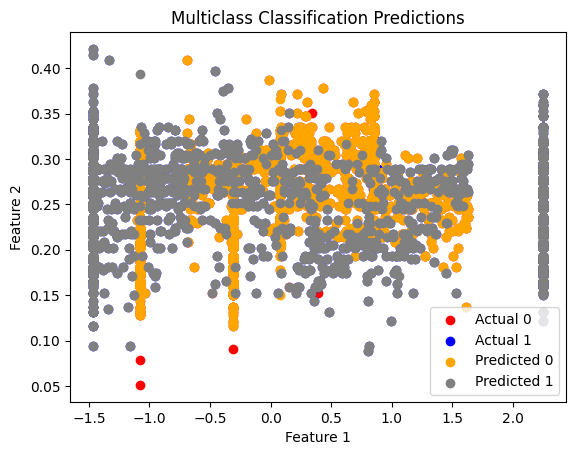

In [41]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
y_true = y_test
# Assuming you have the true labels 'y_true' and the predicted labels 'y_pred'

# Create a scatter plot for the true labels
plt.scatter(X_test[y_true == 0]['Fc'], X_test[y_true == 0]['Tc'], label='Actual 0', c='red')
plt.scatter(X_test[y_true == 1]['Fc'], X_test[y_true == 1]['Tc'], label='Actual 1', c='blue')
# plt.scatter(X_test[y_true == 2]['Fc'], X_test[y_true == 2]['Tc'], label='Actual 0', c='green')
# plt.scatter(X_test[y_true == 3]['Fc'], X_test[y_true == 3]['Tc'], label='Actual 1', c='yellow')
# Add more scatter plots for other classes if needed

# # Create a scatter plot for the predicted labels

plt.scatter(X_test[y_pred == 0]['Fc'], X_test[y_pred == 0]['Tc'], label='Predicted 0', c='orange')
plt.scatter(X_test[y_pred == 1]['Fc'], X_test[y_pred == 1]['Tc'], label='Predicted 1', c='grey')
# plt.scatter(X_test[y_pred == 0, 0], X_test[y_pred == 0, 1], label='Predicted Class 0', marker='x', c='orange')
# plt.scatter(X_test[y_pred == 1, 0], X_test[y_pred == 1, 1], label='Predicted Class 1', marker='x', c='green')
# Add more scatter plots for other predicted classes if needed

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Multiclass Classification Predictions')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Sample data
x = X_test['Fc']
y = X_test['Tc']
predicted_values = y_pred_PIckle  # Replace with your predicted values

# Create scatter plot with different colors for predicted values
plt.scatter(x, y, c=predicted_values, cmap='viridis', s=100, alpha=0.8)  # Adjust 'cmap' for different color maps

# Add color bar
plt.colorbar()

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot with Predicted Values in Different Colors')

# Display the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# no_error=no_error
# Fc_error=Tr_error
# data1_length = len(no_error)
# data2_length = len(Fc_error)

# if data2_length < data1_length:
#    batch_reactor_df  = Fc_error[:data2_length]

# y2 = range(len(y1))
# y1 = range(len(y1))

x = X_test["Fc"]
# x = X_test["Tc"]
# x = X_test["Tr"]
# x = X_test["Tj"]
# y1 = y_test["Tc"]

y1 = y_pred
y2 = y_test

plt.figure(figsize=(10, 10))
plt.scatter(x, y1, label='Predicted', color='red', linestyle='--')

plt.scatter(x, y2+0.05, label='Actual', color='Gray', linestyle='-')


plt.xlabel('Row')
plt.ylabel('Error')

# plt.title('Two Lines for the Same Column from Different Datasets')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve
from sklearn.calibration import calibration_curve
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

# Assuming you have the true labels 'y_true' and the predicted labels 'y_pred'

# 1. Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 2. Classification Report Visualization
classif_report = classification_report(y_test, y_pred)
print(classif_report)

# 3. ROC Curve Visualization (One-vs-Rest strategy)
y_true_binary = label_binarize(y_test, classes=[0, 1, 2,3,4])  # Assuming 3 classes
y_pred_scores = clf.predict_proba(X_test)  # Assuming 'model' is your classifier
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):  # Assuming 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_true_binary[:, i], y_pred_scores[:, i])
    roc_auc[i] = roc_auc_score(y_true_binary[:, i], y_pred_scores[:, i])
for i in range(5):  # Assuming 3 classes
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 4. Precision-Recall Curve Visualization
precision = dict()
recall = dict()
for i in range(5):  # Assuming 3 classes
    precision[i], recall[i], _ = precision_recall_curve(y_true_binary[:, i], y_pred_scores[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best")
plt.title("Precision-Recall Curve")
plt.show()

# 5. Visualizing Decision Boundaries (for 2D data)
# Assuming X_train_2d and y_train_2d are 2D training data and labels
# Assuming model_2d is your classifier
h = .02  # step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train_2d, cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries')
plt.show()

# 6. Visualizing Feature Importances
# Assuming 'model' is your classifier based on feature importance
feature_importances = model.feature_importances_
plt.bar(range(len(feature_importances)), feature_importances)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

# 7. Cumulative Gains Curve Visualization
# Assuming you have the true labels 'y_true' and the predicted scores 'y_pred_scores'
# (Similar to ROC Curve Visualization)

# 8. Lift Curve Visualization
# (Similar to Cumulative Gains Curve Visualization)

# 9. Calibration Curve Visualization
# Assuming 'model

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

precision = precision_score(y_test, y_pred, average=None)*100
recall = recall_score(y_test, y_pred, average=None)*100
accuracy = accuracy_score(y_test, y_pred)*100
f1 = f1_score(y_test, y_pred, average=None)*100

# Plot the bar plot
classes = np.unique(y)
width = 0.2
fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(classes - 1.5 * width, precision, width, label='Precision')
bar2 = ax.bar(classes - 0.5 * width, recall, width, label='Recall')
bar3 = ax.bar(classes + 0.5 * width, f1, width, label='F1-Score')
bar4 = ax.bar(classes + 1.5 * width, [accuracy] * len(classes), width, label='Accuracy')

ax.set_xticks(classes)
ax.set_xticklabels(classes)
ax.legend()

plt.title('Evaluation Metrics for each Class - SVM Classifier (RBF Kernel)')
plt.xlabel('Class')
plt.ylabel('Score')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix to get error rates
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=[f"Class {i}" for i in range(5)],
            yticklabels=[f"Class {i}" for i in range(5)])
plt.title('Confusion Matrix (Normalized)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# X_train = X_train.values

In [ ]:
X_set, Y_set = X_train[:,[0,1]], y_train
clf1 = SVC(kernel='rbf',C=0.1)
clf1.fit(X_set,Y_set)

# Create a meshgrid for decision boundary
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Plot decision boundary
plt.contourf(X1, X2, clf1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75,
             cmap=ListedColormap(('orange', 'green','purple','yellow','red')))

# Plot data points
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c=ListedColormap(('orange', 'green','purple','yellow','red'))(i), label=f'Class {j}')

plt.title('SVM Decision Boundary and Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D


# Extract selected features from the dataset
X_set, Y_set = X_train, y_train

# Train an SVM model with an RBF kernel (replace this with your actual model)
clf1 = SVC(kernel='rbf', C=0.1,gamma=0.1,decision_function_shape='ovo')
clf1.fit(X_set, Y_set)

# Create a meshgrid for decision boundary in 3D
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

# Flatten and predict labels for the meshgrid
Z = clf1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Plot 3D decision boundary
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, alpha=0.5, cmap=ListedColormap(('orange', 'green', 'purple', 'yellow', 'red')))

# Plot 3D scatter plot for data points
for i, j in enumerate(np.unique(Y_set)):
    ax.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
               c=ListedColormap(('orange', 'green', 'purple', 'yellow', 'red'))(i), label=f'Class {j}')

ax.set_title('SVM Decision Boundary and Training Data')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Predicted Class')
ax.legend()

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D


# Extract selected features from the dataset
X_set, Y_set = X_train[:,[0,1]], y_train

# Train an SVM model with an RBF kernel (replace this with your actual model)
# clf1 = SVC(kernel='rbf', C=0.1,gamma=0.1,decision_function_shape='ovo')
pickle_clf.fit(X_set, Y_set)

# Create a meshgrid for decision boundary in 3D
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

# Flatten and predict labels for the meshgrid
Z = pickle_clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Plot 3D decision boundary
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, alpha=0.5, cmap=ListedColormap(('orange', 'green', 'purple', 'yellow', 'red')))

# Plot 3D scatter plot for data points
for i, j in enumerate(np.unique(Y_set)):
    ax.plot(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
               c=ListedColormap(('orange', 'green', 'purple', 'yellow', 'red'))(i), label=f'Class {j}')

ax.set_title('SVM Decision Boundary and Training Data')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Predicted Class')
ax.legend()

plt.show()

In [ ]:
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, alpha=0.5,cmap=ListedColormap(('orange', 'green', 'purple', 'yellow', 'red')))

# Plot 3D scatter plot for data points
for i, j in enumerate(np.unique(Y_set)):
    ax.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
               c=ListedColormap(('orange', 'green', 'purple', 'yellow', 'red'))(i), label=f'Class {j}')

ax.set_title('SVM Decision Boundary and Training Data')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Predicted Class')
ax.legend()

plt.show()

In [ ]:
X_train[:,[2,3]]
np.unique(y_train)

In [ ]:
X_set, Y_set = X_train[:,[2,3]], y_train
clf1 = SVC(kernel='rbf',C=10,decision_function_shape='ovo')
clf1.fit(X_set,Y_set)

# Create a meshgrid for decision boundary
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Plot decision boundary
plt.contourf(X1, X2, clf1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75,
             cmap=ListedColormap(('orange', 'green','purple')))

# Plot data points
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c=ListedColormap(('orange', 'green','purple'))(i), label=f'Class {j}')

plt.title('SVM Decision Boundary and Training Data')
plt.xlabel('Feature 2')
plt.ylabel('Feature 3')
plt.legend()
plt.show()

In [ ]:
data.loc[data["Error"]==1,"Error"] = 1
# data.loc[data["Error"]==4,]


# X = data.iloc[:,[0,1,2,3]]
# y = data.iloc[:,4]

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train[['Fc','Tc','Tr','Tj']] = sc.fit_transform(X_train[['Fc','Tc','Tr','Tj']])
# X_test[['Fc','Tc','Tr','Tj']] = sc.transform(X_test[['Fc','Tc','Tr','Tj']])

# from sklearn.svm import SVC
# clf2 = SVC(kernel='rbf',C=0.1,gamma='auto')
# clf2.fit(X_train,y_train)

# y_pred = clf2.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve
from sklearn.calibration import calibration_curve
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

# Assuming you have the true labels 'y_true' and the predicted labels 'y_pred'

# 1. Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 2. Classification Report Visualization
classif_report = classification_report(y_test, y_pred)
print(classif_report)

# 3. ROC Curve Visualization (One-vs-Rest strategy)
y_true_binary = label_binarize(y_test, classes=[0, 1, 2,3,4])  # Assuming 3 classes
y_pred_scores = clf.predict_proba(X_test)  # Assuming 'model' is your classifier
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):  # Assuming 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_true_binary[:, i], y_pred_scores[:, i])
    roc_auc[i] = roc_auc_score(y_true_binary[:, i], y_pred_scores[:, i])
for i in range(5):  # Assuming 3 classes
    plt.plot(fpr[i], tpr[i], label=f'ROC curve Class-{i} (area = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 4. Precision-Recall Curve Visualization
precision = dict()
recall = dict()
for i in range(5):  # Assuming 3 classes
    precision[i], recall[i], _ = precision_recall_curve(y_true_binary[:, i], y_pred_scores[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best")
plt.title("Precision-Recall Curve")
plt.show()
